<h3>What is Spectral Leakage?</h3>
<b>Definition:</b>
Spectral leakage refers to the phenomenon where energy from one frequency bin "leaks" into others when performing a Discrete Fourier Transform. This causes the frequency domain representation to show false or smeared frequencies.

<hr>
<h3>Why Does It Happen?</h3>
<b>Because DFT assumes the signal is periodic within the window.</b>

Let’s say you sample a signal and apply a DFT (via np.fft.fft). The DFT algorithm assumes your signal repeats perfectly in a loop. If your window doesn't contain an integer number of periods of the signal, then when you "loop" the window, there's a discontinuity at the edges.

This discontinuity introduces high-frequency components, and those "false" components show up in the frequency domain as side lobes or smeared frequencies.

In [1]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


frequency = 5         # in Hz
amplitude = 1.0       # peak value
phase = 0             # in radians
duration = 2          # seconds
sampling_rate = 1000  # samples per second (higher => smoother)

# Time vector
t = np.linspace(0, duration, int(sampling_rate * duration), endpoint=False)

# Sine wave
y = amplitude * np.sin(2 * np.pi * frequency * t + phase)

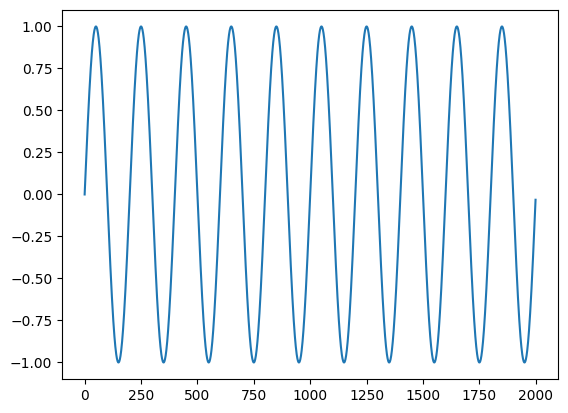

In [2]:
plt.plot(y)

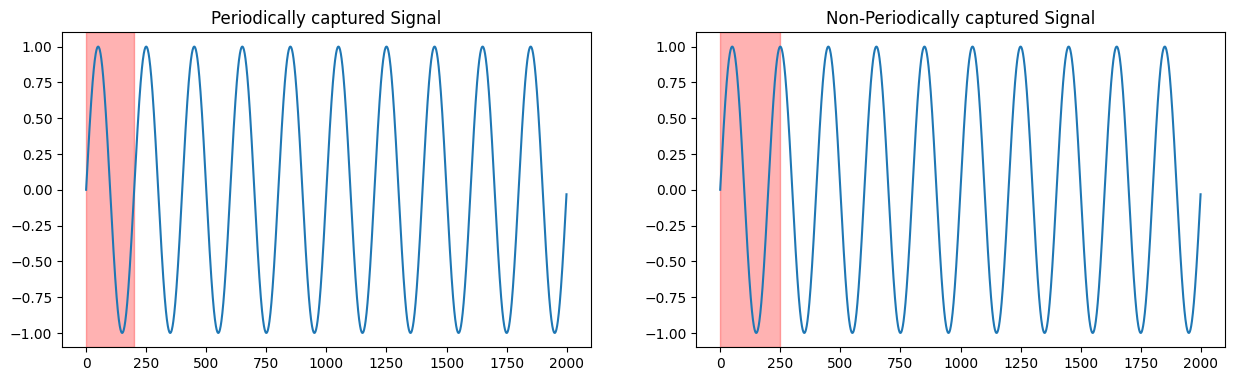

In [3]:
window_start = 0  # seconds
window_end = 200    # seconds

plt.figure(figsize=(15, 9))
plt.subplot(2, 2, 1)
plt.title("Periodically captured Signal")
plt.axvspan(window_start, window_end, color='red', alpha=0.3, label='Selected Window')
plt.plot(y)

plt.subplot(2, 2, 2)
plt.title("Non-Periodically captured Signal")
plt.axvspan(window_start, window_end+50, color='red', alpha=0.3, label='Selected Window')
plt.plot(y)

plt.show()

In [4]:
window_0_200 = y[window_start:window_end]
window_0_250 = y[window_start:window_end + 50]

In [5]:
# Custom DFT implementation
def custom_dft(x):
    N = len(x)
    X = []
    for k in range(N):     # k - freq index
        s = 0
        for n in range(N): # n - time index
            angle = -2j * np.pi * k * n / N
            s += x[n] * np.exp(angle)
        X.append(s)
    return np.array(X)

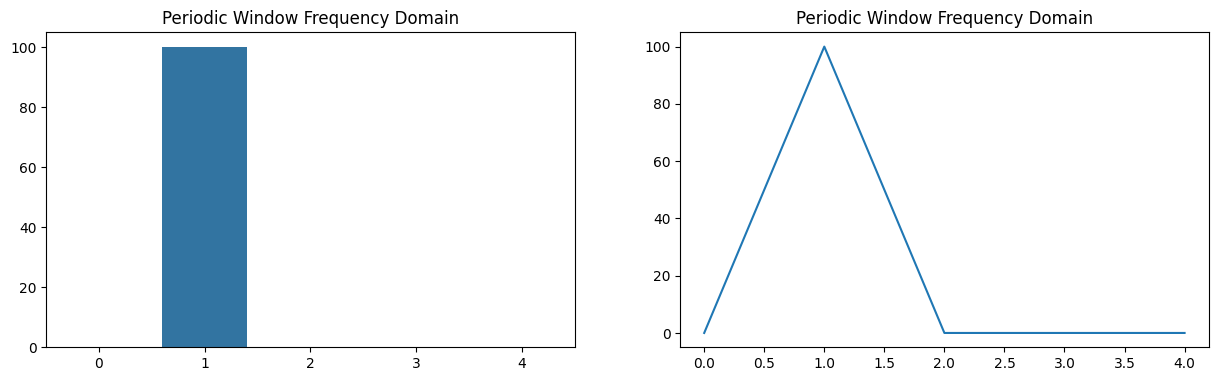

In [6]:
X = custom_dft(window_0_200)
freq = np.arange(0, 1000)

# Magnitude and Phase
magnitude = np.abs(X)   # np.sqr(a^2 + b^2)
phase = np.angle(X)     # arctan2(b_i, a)

plt.figure(figsize=(15, 9))
plt.subplot(2, 2, 1)
sns.barplot(magnitude[:5])
plt.title("Periodic Window Frequency Domain")

plt.subplot(2, 2, 2)
plt.plot(magnitude[:5])
plt.title("Periodic Window Frequency Domain")
plt.show()

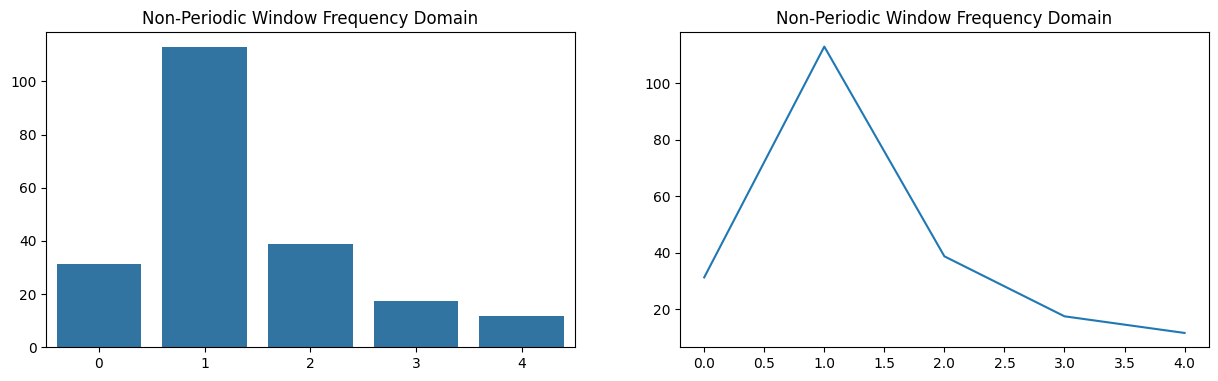

In [7]:
X = custom_dft(window_0_250)
freq = np.arange(0, 1000)

# Magnitude and Phase
magnitude = np.abs(X)   # np.sqr(a^2 + b^2)
phase = np.angle(X)     # arctan2(b_i, a)

plt.figure(figsize=(15, 9))
plt.subplot(2, 2, 1)
sns.barplot(magnitude[:5])
plt.title("Non-Periodic Window Frequency Domain")
plt.subplot(2, 2, 2)
plt.plot(magnitude[:5])
plt.title("Non-Periodic Window Frequency Domain")
plt.show()

As we can see in the plots, the Non-Periodic window has false frequencies nearby main frequency, this is called a <b>spectral leakage</b> 

---

### Windoing 

- A window function is a mathematical function that is zero valued (or almost zero, depends on function) outside of some chosen interval. symmetric around middle interval. having maximum value in the middle and tapers away from the middle.
- The main purpose of a window is to reduce the sharp discontuinities that occur when trying to append non-periodically measured signals.
- There are different types of windows catered to specific signal processing requirements.
--- 
### Windoing Process

- The signal is acquired non-periodically.
- This acquired block of signal is multiplied by a chosen window function.
- The windowed signal is then appended to create a continuous waveform.
- There are no sharp discontinuities present in the continuous waveform due to windowing.
---

In [8]:
def hann(
    N: int
):
    return 0.5 * (1 - np.cos(2 * np.pi * np.arange(N) / (N - 1)))

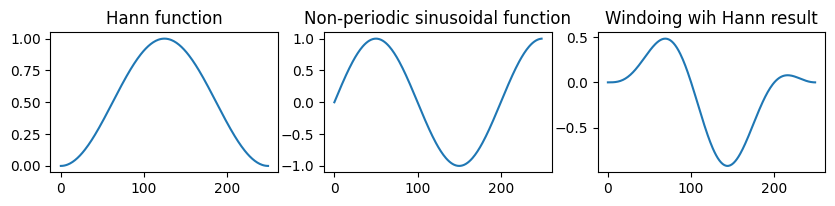

In [9]:
hann_values = hann(N=len(window_0_250))

windowed_0_250 = window_0_250 * hann_values

plt.figure(figsize=(10, 4))
plt.subplot(2, 3, 1)
plt.plot(hann_values)
plt.title("Hann function")

plt.subplot(2, 3, 2)
plt.plot(window_0_250)
plt.title("Non-periodic sinusoidal function")

plt.subplot(2, 3, 3)
plt.plot(windowed_0_250)
plt.title("Windoing wih Hann result")
plt.show()

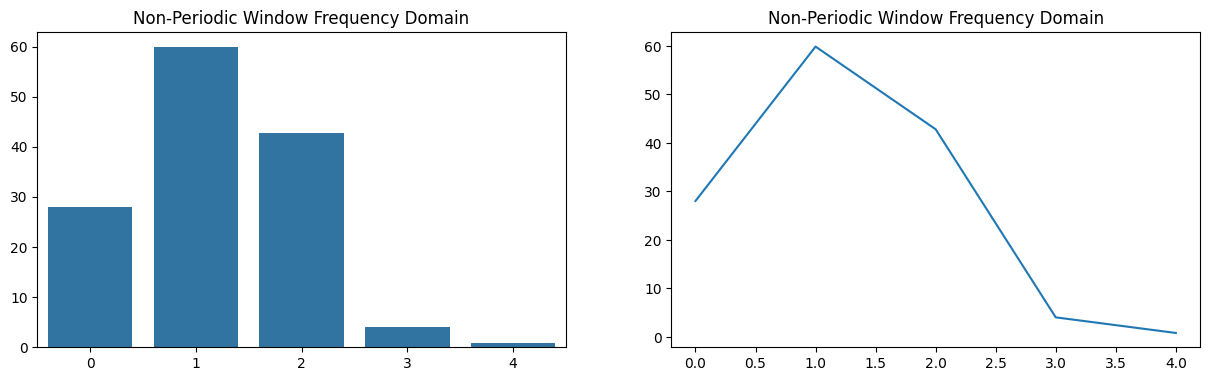

In [10]:
X = custom_dft(windowed_0_250)
freq = np.arange(0, 1000)

# Magnitude and Phase
magnitude = np.abs(X)   # np.sqr(a^2 + b^2)
phase = np.angle(X)     # arctan2(b_i, a)

plt.figure(figsize=(15, 9))
plt.subplot(2, 2, 1)
sns.barplot(magnitude[:5])
plt.title("Non-Periodic Window Frequency Domain")
plt.subplot(2, 2, 2)
plt.plot(magnitude[:5])
plt.title("Non-Periodic Window Frequency Domain")
plt.show()

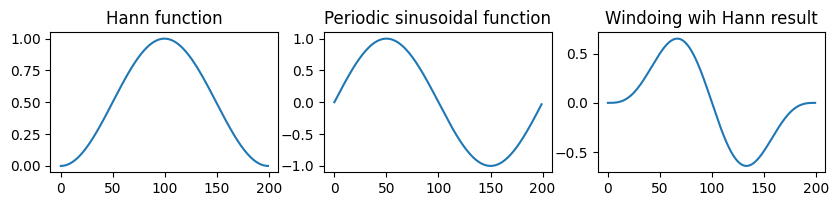

In [11]:
hann_values = hann(N=len(window_0_200))

windowed_0_200 = window_0_200 * hann_values

plt.figure(figsize=(10, 4))
plt.subplot(2, 3, 1)
plt.plot(hann_values)
plt.title("Hann function")

plt.subplot(2, 3, 2)
plt.plot(window_0_200)
plt.title("Periodic sinusoidal function")

plt.subplot(2, 3, 3)
plt.plot(windowed_0_200)
plt.title("Windoing wih Hann result")
plt.show()

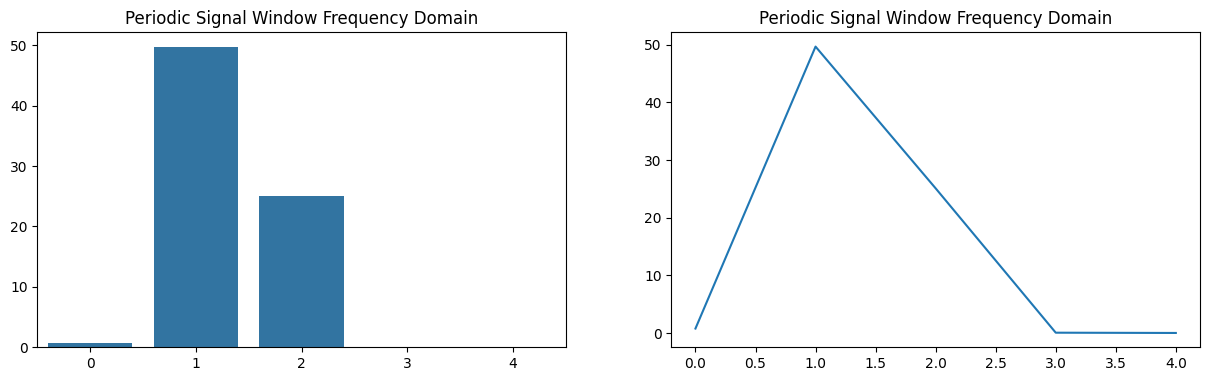

In [12]:
X = custom_dft(windowed_0_200)
freq = np.arange(0, 1000)

# Magnitude and Phase
magnitude = np.abs(X)   # np.sqr(a^2 + b^2)
phase = np.angle(X)     # arctan2(b_i, a)

plt.figure(figsize=(15, 9))
plt.subplot(2, 2, 1)
sns.barplot(magnitude[:5])
plt.title("Periodic Signal Window Frequency Domain")
plt.subplot(2, 2, 2)
plt.plot(magnitude[:5])
plt.title("Periodic Signal Window Frequency Domain")
plt.show()

---
### Windoing Corrections
- Windoing helps to smooth out the sharp transitions at discontinuities which considerably reduces the spectral leakage.
- However, the final windowed continuos waveform does not exactly resemble the actual waveform.
- There is a compromise on both amplitude and energy of the signal.
- Window corrections are available for each window type but both amplitude and energy corrections cannot be applied at the same time.
---
### Windoing a periodically captured signal
- A periodically captured signal which can be appended to create the original continous waveform does not require windowing.
- However, if windowing is applied on such a signal, it would result in spectral leakage in the frequency domain.
---

Now, I need to apply windowing with different hop size, to see how much information from original signal we lose



In [13]:
window_size = 1024
hop_sizes = [128, 256, 512, 1024]

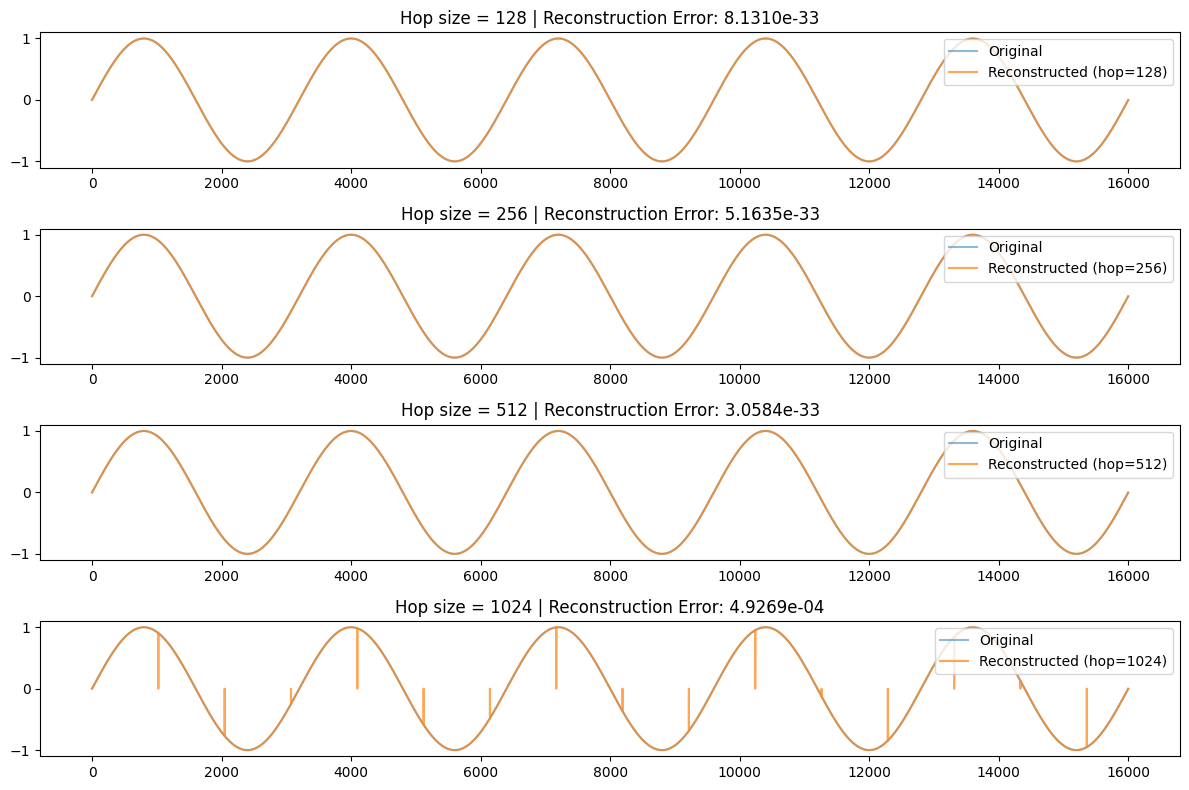

In [14]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import get_window

# Generate example signal (sine + noise)
fs = 16000
duration = 1.0
t = np.linspace(0, duration, int(fs * duration), endpoint=False)
original_signal = np.sin(2 * np.pi * 5 * t)

# Window and hop settings
window_size = 1024
hop_sizes = [128, 256, 512, 1024]
window = get_window('hann', window_size)

def frame_signal(sig, window, hop):
    num_frames = int(np.ceil((len(sig) - window_size) / hop)) + 1
    padded_len = (num_frames - 1) * hop + window_size
    padded_sig = np.zeros(padded_len)
    padded_sig[:len(sig)] = sig
    frames = np.zeros((num_frames, window_size))

    for i in range(num_frames):
        start = i * hop
        frames[i] = padded_sig[start:start + window_size] * window
    return frames, padded_len

def overlap_add(frames, hop, total_len):
    reconstructed = np.zeros(total_len)
    window_sum = np.zeros(total_len)
    for i, frame in enumerate(frames):
        start = i * hop
        reconstructed[start:start + window_size] += frame
        window_sum[start:start + window_size] += window
    # Avoid division by zero
    nonzero = window_sum > 1e-8
    reconstructed[nonzero] /= window_sum[nonzero]
    return reconstructed

# Plot
plt.figure(figsize=(12, 8))
for idx, hop in enumerate(hop_sizes):
    frames, total_len = frame_signal(original_signal, window, hop)
    reconstructed = overlap_add(frames, hop, total_len)
    
    # Match original length
    reconstructed = reconstructed[:len(original_signal)]
    
    # Compute error
    mse = np.linalg.norm(original_signal - reconstructed) ** 2 / len(reconstructed)
    
    plt.subplot(len(hop_sizes), 1, idx + 1)
    plt.plot(original_signal, label='Original', alpha=0.5)
    plt.plot(reconstructed, label=f'Reconstructed (hop={hop})', alpha=0.7)
    plt.title(f"Hop size = {hop} | Reconstruction Error: {mse:.4e}")
    plt.legend(loc='upper right')

plt.tight_layout()
plt.show()

In [15]:
ones = np.ones(shape=(1, 100))

In [16]:
len(ones[0])

100

In [17]:
def apply_windowing(signal, window_size, hop_size, hann_values):
    # Frame and apply window
    frames = []
    for start in range(0, len(signal) - window_size + 1, hop_size):
        frame = signal[start:start + window_size] * hann_values
        frames.append(frame)
    return frames
    
    # slices = []
    # start = 0
    # for end in range(window_size, len(ones[0]) + window_size, hop_size):
    #     slice_ = ones[0][start:end]
    #     slice_ = slice_ * hann_values
    #     start += hop_size
    #     slices.append(slice_)
    # return slices
    

def get_reconstruction(slices, window_size, hop_size, hann_values):
    # Overlap-add reconstruction
    reconstructed = np.zeros(shape=(1, 100))[0]
    normalizer = np.zeros(shape=(1, 100))[0]
    
    for i, frame in enumerate(slices):
        start = i * hop_size
        reconstructed[start:start + window_size] += frame
        normalizer[start:start + window_size] += hann_values  # sum of squared windows if desired
    
    # Avoid divide by zero
    eps = 1e-8
    normalized_reconstructed = reconstructed / (normalizer + eps)
    return normalized_reconstructed

In [18]:
hop_size = 10
window_size = 10
hann_values = hann(N=window_size)

slices = apply_windowing(
    ones[0],
    window_size, 
    hop_size, 
    hann_values
)
output = np.concatenate(slices, axis=0)
normalized_reconstructed = get_reconstruction(
    slices, 
    window_size, 
    hop_size, 
    hann_values
)

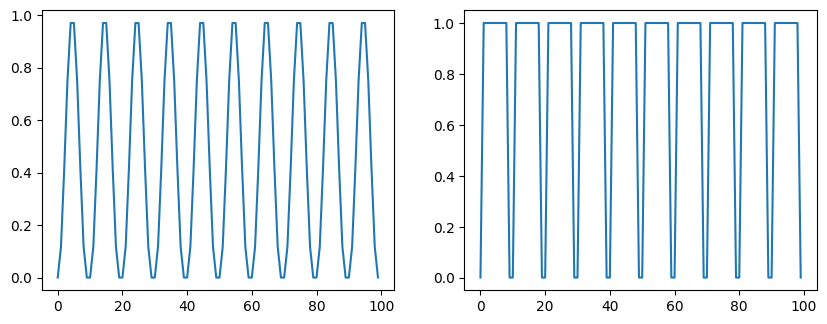

In [19]:
plt.figure(figsize=(10, 8))
plt.subplot(2, 2, 1)
plt.plot(output)
plt.subplot(2, 2, 2)
plt.plot(normalized_reconstructed)
plt.show()

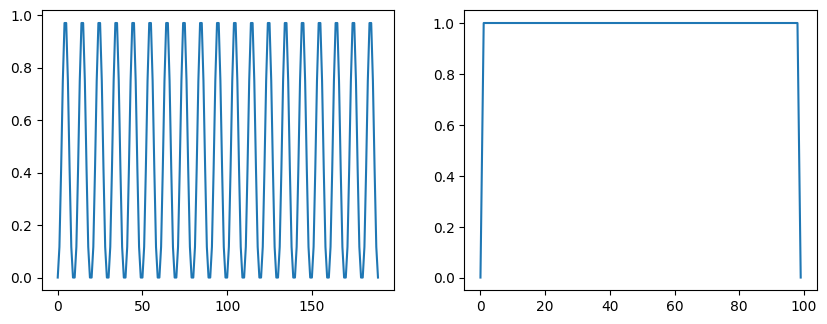

In [20]:
hop_size = 5
window_size = 10
hann_values = hann(N=window_size)

slices = apply_windowing(
    ones[0],
    window_size, 
    hop_size, 
    hann_values
)
output = np.concatenate(slices, axis=0)
normalized_reconstructed = get_reconstruction(
    slices, 
    window_size, 
    hop_size, 
    hann_values
)
plt.figure(figsize=(10, 8))
plt.subplot(2, 2, 1)
plt.plot(output)
plt.subplot(2, 2, 2)
plt.plot(normalized_reconstructed)
plt.show()

<img src="../images/windoing_functions.png">

Window Function Comparison
Core Concepts

<u>Main-Lobe Width</u>

The width of the central peak in the frequency domain.

Narrow → Better frequency resolution, but may allow leakage.

Wide → Worse resolution, but better leakage control.

<u>Side-Lobe Level</u>

Side lobes represent leakage into neighboring frequencies.

Lower side lobes mean less spectral leakage and better suppression of false frequencies.

Window Comparisons
1. <u>Rectangular</u>

    <b>Main-Lobe Width:</b> Narrowest

    <b>Side-Lobe Level:</b> ❌ High

    <b>Notes:</b> No tapering, best frequency resolution but worst leakage

    <b>Use Case:</b> When exact resolution is needed and leakage is acceptable

2. <u>Hann</u>

    <b>Main-Lobe Width:</b> Medium

    <b>Side-Lobe Level:</b> -31 dB

    <b>Notes:</b> Smooth cosine taper

    <b>Use Case:</b> Balanced spectral resolution and leakage suppression

3. <u>Hamming</u>

    <b>Main-Lobe Width:</b> Medium

    <b>Side-Lobe Level:</b> -43 dB

    <b>Notes:</b> Better side lobe suppression than Hann

    <b>Use Case:</b> Audio/speech analysis with improved leakage control

4. <u>Blackman</u>

    <b>Main-Lobe Width:</b> Wide

    <b>Side-Lobe Level:</b> -58 dB

    <b>Notes:</b> Excellent suppression of leakage

    <b>Use Case:</b> When minimal leakage is more important than resolution

5. <u>Kaiser (β=8.6)</u>

    <b>Main-Lobe Width:</b> Variable

    <b>Side-Lobe Level:</b> Variable

    <b>Notes:</b> Tunable balance of width and suppression via β

    <b>Use Case:</b> Versatile applications needing adjustable parameters

6. <u>Tukey (α=0.5)</u>

    <b>Main-Lobe Width:</b> Variable

    <b>Side-Lobe Level:</b> Variable

    <b>Notes:</b> Blends between rectangular and Hann

    <b>Use Case:</b> Transitional designs with adjustable tapering

7. <u>Gaussian (std=7)</u>

    <b>Main-Lobe Width:</b> Medium

    <b>Side-Lobe Level:</b> Good

    <b>Notes:</b> Bell-shaped, smooth in both time and frequency

    <b>Use Case:</b> Time-frequency analysis, radar, smooth decay

8. <u>Flat Top</u>

    <b>Main-Lobe Width:</b> Widest

    <b>Side-Lobe Level:</b> ✅ Low

    <b>Notes:</b> Good for accurate amplitude measurements

    <b>Use Case:</b> Spectral amplitude analysis (e.g., FFT-based instruments)

---

| Window       | Main-Lobe Width | Side-Lobe Level | Best For                           |
|--------------|------------------|------------------|------------------------------------|
| Rectangular  | Narrowest        | ❌ High           | Frequency resolution               |
| Hann         | Medium           | -31 dB            | Balanced windowing                 |
| Hamming      | Medium           | -43 dB            | Speech/audio leakage reduction     |
| Blackman     | Wide             | -58 dB            | High suppression, low leakage      |
| Kaiser (β)   | Variable         | Variable          | Tunable trade-off                  |
| Tukey (α)    | Variable         | Variable          | Blend between Hann and Rectangular |
| Gaussian     | Medium           | Good              | Smooth spectral behavior           |
| Flat Top     | Widest           | ✅ Low             | Amplitude accuracy                 |


--- 
# Decibels in frequency domain? Distinguishing Time domain features from Frequency domain

#### Amplitude

- Time domain amplitude is just the signal’s height. This is how we call loud or quiet.
- Frequency domain magnitude means “how much energy this frequency has.”. It is equivalent to amplitude.

---

#### What Are Decibels (dB) in Signal Processing?

This is how we measure the loudness of a sound and adjust by demand. 


<b>Decibels (dB)</b> are a logarithmic unit used to express ratios of power, intensity, or amplitude in a compact, scale-invariant form. In both time and frequency domain analysis, decibels quantify relative changes rather than absolute values.


In the time domain, decibels are used to describe the relative amplitude or power of a signal over time.

<b>Power-based dB:</b>

dB=10⋅log_{⁡10} \left( \frac{P}{P_0} \right)


Where:

- P: signal power
- $ P_0 $: reference power

Use case: In digital audio, the time-domain waveform amplitude (e.g., sample values) is often converted to dB to represent loudness or dynamic range.


Amplitude-based dB (used for voltage or signal magnitude):
$$
dB=20⋅log_{10} \left( \frac{A}{A_0} \right)
$$

Where:

    A: measured amplitude (e.g., voltage)

    A_0: reference amplitude
    
---

### Why Use Logarithm (Base 10) in Decibels?

<h3>1. Human perception is logarithmic</h3>

The human ear and many other sensory systems perceive intensity <b>logarithmically</b>, not linearly. This means:

- If the power of a sound increases by a factor of 10, it is perceived as “twice as loud.”

- We don't hear the <b>absolute</b> value of sound pressure or intensity—we hear the <b>ratio</b> between levels.


Using logarithms helps align our measurements with human perception.


<h3>2. Wide dynamic range</h3>

Signals (like sound, electrical, or radio) can vary over a <b>huge range</b> of power or amplitude—often by factors of millions or billions.

- A logarithmic scale compresses this range into manageable numbers.

- Instead of writing numbers like 0.000001 or 1,000,000, we can use a scale from -60 dB to +60 dB, for example.

<h3>3. Base 10 is conventional</h3>

We use <b>log base 10</b> (also called the <b>common logarithm</b>) because:

- It’s easy to interpret and aligns well with the decimal system.

- It's a convention adopted in engineering fields such as acoustics, electronics, and communications.

--- 

### Why Multiply by 10?

"deci" = one-tenth of a bel → decibel = 1/10 bel

    1. Bel = log₁₀(P₂ / P₁)
    2. decibel = 0.1 Bel = 10 · log₁₀(P₂ / P₁)

his gives a finer scale for comparison:

    Instead of saying “1 Bel,” we say “10 decibels”

    Instead of “0.3 Bel,” we say “3 dB”

Multiplying by 10 allows decibel values to be whole numbers or more easily interpreted small decimals.

--- 

We multiply by 10 because of how logarithmic ratios work:

The <b>logarithm of a ratio</b> tells us how many times larger one value is than another on a multiplicative scale.

Multiplying by 10 turns this into <b>decibels</b>, where:

- +10 dB means <b>10 times more power than the reference level.</b>

- +3 dB means approximately <b>2 times more power than the reference level.</b>

- 0 dB means <b>equal power than the reference level.</b>

- -10 dB means <b>1/10 the power than the reference level.</b>



<b>Threshold of Hearing is $P_0$ the reference level<b>
    
<b>Important: dB is not an absolute unit — it’s a relative measure.</b>

---

### Why multiply by 20?

When dealing with amplitude (such as voltage, sound pressure, or signal magnitude), power is proportional to the square of amplitude:
<b>
P ∝ A²
</b>

So when we want to compute decibels using amplitude ratios, we need to square them to represent power:

<p>
dB = 10 &middot; log<sub>10</sub>(P / P<sub>0</sub>) <br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;= 10 &middot; log<sub>10</sub>(A<sup>2</sup> / A<sub>0</sub><sup>2</sup>) <br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;= 10 &middot; log<sub>10</sub>((A / A<sub>0</sub>)<sup>2</sup>) <br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;= 10 &middot; 2 &middot; log<sub>10</sub>(A / A<sub>0</sub>) <br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;= 20 &middot; log<sub>10</sub>(A / A<sub>0</sub>)
</p>

---

| Concept           | Reason                                                              |
| ----------------- | ------------------------------------------------------------------- |
| Logarithmic scale | Matches human perception, compresses large ratios                   |
| Log base 10       | Practical, interpretable, historically based on the Bel             |
| Multiply by 10    | A decibel is one-tenth of a Bel, allows finer granularity in values |

---

### Frequency decibels

1. At first we apply to windowed signal DFT

X = np.fft.fft(windowed_signal)

2. Compute magnitude 

magnitude = np.abs(X)

3. Convert frequency magnitude into decibels

db_values = 20 * np.log10(magnitude / np.max(magnitude))

### Why Convert Magnitudes to dB?

1. Logarithmic Perception

Humans perceive sound logarithmically. Converting to dB aligns with perceived loudness or perceived strength of frequency components.


2. Wide Dynamic Range Compression
Without dB scaling, low-magnitude components (like side-lobes or noise floor) can be almost invisible on linear scale plots. dB makes both strong and weak components visible.

3. Interpretability

    Main lobe and side lobes can be compared in dB scale, e.g.,:

        Side lobe at −40 dB → its magnitude is 1/100 of the main lobe

Spectrograms show frequency activity over time, where color/intensity reflects log-scaled magnitude, which is easier to analyze visually.

---

### Spectral Leakage and dB Interpretation
### What is Spectral Leakage?

When you apply DFT to a non-periodic or non-windowed segment, energy “leaks” into adjacent frequencies — forming side lobes.

#### Why Use dB for Leakage?
Because the leaked components are much weaker than the main tone — and dB reveals that:

    Main lobe: 0 dB

    First side lobe: −13 dB (for rectangular window)

    Hann window: −31 dB side lobes

    Blackman window: −58 dB side lobes

By plotting the spectrum in dB, you can <b>quantitatively evaluate:</b>
    How much energy leaked

    How effective your windowing is

    How well your system suppresses undesired frequency spreading

### When is This Used?

    Spectrogram visualizations

    Evaluating window functions

    Measuring spectral leakage

    Analyzing noise floors

    Audio equalization

    Filter design validation

---

<img src="../images/windoing_functions_spectral_leakage.png">

Here is the comparison of spectral leakage for various window functions. Each plot shows the frequency response (in decibels) of the window, highlighting:

- <b>Main Lobe Width:</b> Central peak around the actual frequency.
- <b>Side Lobe Levels:</b> Indicate how much energy "leaks" into neighboring frequencies.

<b>Key Observations:</b>

- Rectangular: Sharpest resolution (narrow main lobe) but highest leakage (strong side lobes).

- Blackman, Flat Top: Excellent leakage suppression (low side lobes), but very wide main lobe (poor resolution).

- Hamming vs. Hann: Similar shape, but Hamming suppresses side lobes better (~−43 dB vs. ~−31 dB).

- Kaiser, Tukey, Gaussian: Offer tunable trade-offs via parameters like β, α, or std.

---
| Property         | **Hann Window**                    | **Hamming Window**                     |
| ---------------- | ---------------------------------- | -------------------------------------- |
| Main Lobe Width  | Slightly wider (\~8π/N)            | Slightly narrower (\~8π/N, very close) |
| First Side Lobe  | \~−31 dB                           | \~−43 dB                               |
| Side-Lobe Decay  | Falls off faster                   | Falls off slower                       |
| Spectral Leakage | More side-lobe energy              | Less side-lobe energy (initially)      |
| Use Case         | Balanced time-frequency resolution | Emphasizes better leakage control      |

---

### Visual Misleading Aspect

When you look at the full spectrum, Hann may look smoother because:

    The energy in side lobes is spread more gradually.

    Hamming, while suppressing the first lobe well, may show more “ripples” further out.

---

| Situation                               | Recommended Window                              |
| --------------------------------------- | ----------------------------------------------- |
| Precise frequency measurement           | **Hann** (sharper lobe, smoother overall decay) |
| Low-leakage needed (speech, audio FFTs) | **Hamming**                                     |
| You want visual symmetry in plots       | **Hann**                                        |
| Accuracy of amplitude is critical       | **Flat Top**, **Blackman**                      |
